## **Exercises: Lesson 5**
Hanaan Shafi

---




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Exercise 5.1:** The Caesar's cipher is a historically relevant way of encrypting messages, already used by Julius Caesar, that is a substitution cipher. Given an integer value m, any character is replaced by the character found shifting the original character by m positions in the alphabet. Prepare a function that encrypts or decrypts a given message (assuming we only use the 26 capital letters of the English alphaber and replacing other symbols that are not letters by themselves, e.g. spaces and punctuation symbols) using a given value of m. 

Hints: 

(1) You can transform a string in uppercase characters using the upper() method (up_strin = orig_string.upper()).

 (2) You can obtain the English ASCII uppercase letters using the module string (import string) with the command ABC = string.ascii_uppercase.

In [2]:
def caesar_cipher(msg, m):

  """ 
  encrypts the input string according to Caesar's 
  Cipher given an integer value m
  """

  encrypted_msg = "" # empty string to store the final result

  for char in msg: # loop through the charcters in the input string
    if char.isupper(): # if it is uppercase, then only shift
      encrypted_msg += chr(((ord(char) - ord('A') + m) % 26) + ord('A'))
    elif char.islower(): # if lowercase, shift and convert to uppercase
      encrypted_msg += (chr(((ord(char) - ord('a') + m) % 26) + ord('A'))).upper()
    else:
      encrypted_msg += char # else, do nothing

  return encrypted_msg

# testing
msg = input("Enter your message: ")
m = int(input("Enter an integer m: "))
print("This is your message after encryption: ", caesar_cipher(msg, m))

Enter your message: The quick brown fox jumps over the lazy dog!
Enter an integer m: 5
This is your message after encryption:  YMJ VZNHP GWTBS KTC OZRUX TAJW YMJ QFED ITL!


**Exercise 5.2:** The NIST Digital Library of Mathematical Functions (DLMF) is a very useful site, where you can find an updated and expanded version of the well-known reference Handbook of Mathematical Functions compiled by Abramowitz and Stegun. Define a function to compute the Bessel function of the first kind of integer index from the series 10.2.2 in the DLMF, add a docscript and plot the functions of order 0, 1, and 2 in the interval of x between 0 and 10.

Text(0.5, 1.0, 'Bessel Functions of the First Kind')

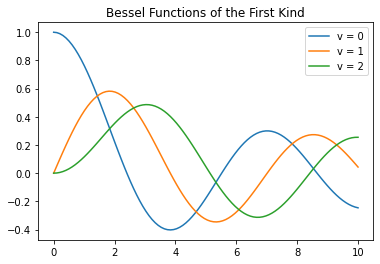

In [3]:
def Bessel(z, v, n):
  
  """ returns the Bessel function of the first kind """

  # first, computing just the sum part of the function upto the nth term
  sum = 0
  for k in range(n):
    sum += ((-1)**k) * ((0.25*(z**2))**k) / (np.math.factorial(k) * np.math.gamma(v + k + 1)) 
  
  # now compute bessel:
  J = ((z*0.5)**v)*sum 
  return J


# plotting the functions
x = np.linspace(0, 10, 100)
J0 = []
J1 = []
J2 = []
for i in x:
  J0.append(Bessel(i, 0, 20))
  J1.append(Bessel(i, 1, 20))
  J2.append(Bessel(i, 2, 20))

fig, ax = plt.subplots()
ax.plot(x.tolist(), J0, label = "v = 0")
ax.plot(x.tolist(), J1, label = "v = 1")
ax.plot(x.tolist(), J2, label = "v = 2")
ax.legend()
ax.set_title("Bessel Functions of the First Kind")

**Exercise 5.3:** Define and test a function that estimates the value of the special constant pi by generating N pairs of random numbers in the interval -1 and 1 and checking how many of the generated number fall into a circumference of radius 1 centered in the origin. Improve the function showing in a graphical output the square, the circumference, and the points inside and outside the circumference with different colors.

In [4]:
def estimate_pi(N):

  """ estimates the value of pi using the ratio of the area of circle to square """

  # defining np arrays with random numbers between -1 and 1
  p, q = 2*np.random.rand(N) - 1, 2*np.random.rand(N) - 1

  # initiating counts for points inside circle/square
  inside_circle, inside_square = 0, 0

  # lists to store (x,y) outside and inside circle (for plotting later)
  outside_circleX = []
  outside_circleY = []
  inside_circleX = []
  inside_circleY = [] 

  # looping through the arrays to find points inside circle/square
  for i in range(0, N):
    inside_square += 1
    if np.sqrt(p[i]**2 + q[i]**2) <= 1:
      inside_circle += 1
      inside_circleX.append(p[i])
      inside_circleY.append(q[i])
    else:
      outside_circleX.append(p[i])
      outside_circleY.append(q[i])

  # calculating pi 
  pi_value = 4*inside_circle/inside_square
  print("The value of pi is estimated to be", pi_value)

  # plotting
  fig, ax = plt.subplots(figsize=(7,7))
  circle = plt.Circle((0, 0), 1, fill = False)
  ax.scatter(outside_circleX, outside_circleY, s=15)
  ax.scatter(inside_circleX, inside_circleY, s=15)
  ax.add_patch(circle)
  ax.margins(x=0, y=0)
  ax.set_aspect('equal')
  fig.show()

The value of pi is estimated to be 3.064


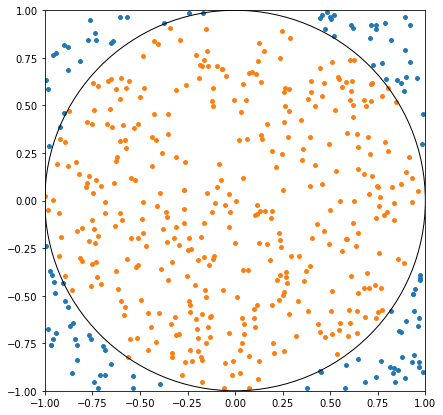

In [5]:
estimate_pi(500)

**Exercise 5.4:** The aim of this exercise is to generate a set of two-dimensional random walks, plot their trajectories and look at the end point distribution. The random walks considered always begin at the origin and take Nstep random steps of unit or zero size in both directions in the x and y axis. 

For a total number of Nw walks: 

1. Compute the trajectories and save the final point of all of them. 

2. Plot a sample of these random walks in the plane. 

3. Plot all the final points together. 

4. Compute the average distance of the final points from the origin. 

5. Plot a histogram with the values of the distance to the origin.

In [6]:
def random_walk(nstep):

  """ returns coordinates (x,y) for a random walk
  beginning at the origin """

  # initiating arrays to store the coordinates
  x = np.zeros(nstep)
  y = np.zeros(nstep)

  # list to store movement options
  moves = ['l', 'r', 'u', 'd'] # four options

  # loop through the total number of steps nstep  
  for i in range(1, nstep):
    random_index = random.randint(0,3) # this random integer will be used as an index for our moves list
    # set x[i] and y[i] according to the random directions picked
    if moves[random_index] == "l":
      x[i] = x[i - 1] - 1
      y[i] = y[i - 1]
    elif moves[random_index] == "r":
      x[i] = x[i - 1] + 1
      y[i] = y[i - 1]
    elif moves[random_index] == "u":
      x[i] = x[i - 1]
      y[i] = y[i - 1] + 1
    elif moves[random_index] == "d":
      x[i] = x[i - 1]
      y[i] = y[i - 1] - 1
    
  return x, y

In [7]:
# user input for nw and nstep
nw = int(input("Enter the number of random walks: "))
nstep = int(input("Enter the number of steps per walk: "))

walks = []
for i in range(nw):
   walks.append(random_walk(nstep))

Enter the number of random walks: 6
Enter the number of steps per walk: 75


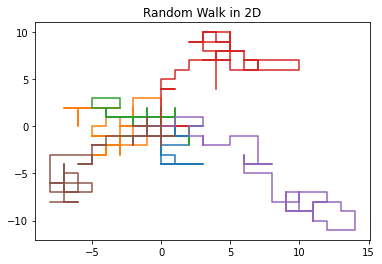

In [8]:
# plot trajectories
fig, ax = plt.subplots()
for i in range(nw):
  ax.plot(walks[i][0], walks[i][1])
ax.set_title("Random Walk in 2D")
fig.show()

In [9]:
# saving the final points (as asked in the question)
finalX = []
finalY = []
for i in range(nw):
  finalX.append(walks[i][0][-1])
  finalY.append(walks[i][1][-1])

print(finalX)
print(finalY)

[-2.0, -2.0, -3.0, 4.0, 11.0, -8.0]
[0.0, 2.0, -1.0, 4.0, -9.0, -8.0]


Text(0.5, 1.0, 'The final points of the trajectories')

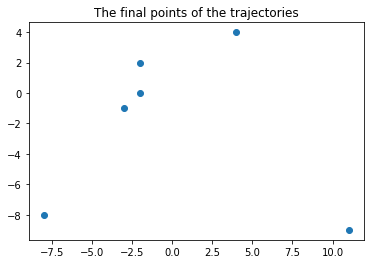

In [10]:
# plot final points
fig, ax = plt.subplots()
ax.scatter(finalX, finalY)
ax.set_title("The final points of the trajectories")

In [11]:
# compute average distance of the final points from the origin

sum = 0 # initiating a sum (which will later be used to compute average)
dlist = [] # list of average distances
for x in finalX:
  d = np.sqrt(x**2 + (finalY[finalX.index(x)])**2)
  dlist.append(d)
  sum += d

average = sum / nw
print("The average distance of the final points from the origin is" , average, "units.")

The average distance of the final points from the origin is 6.39091846869957 units.


Text(0, 0.5, 'Final Distance from Origin')

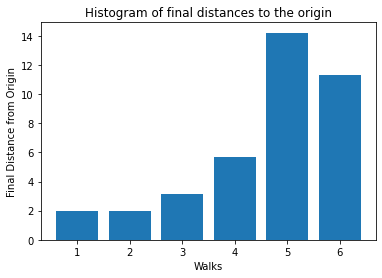

In [12]:
# histogram of final distances to the origin
barX = []
for i in range(nw):
  barX.append(i+1)

fig, ax = plt.subplots()
ax.bar(barX, dlist)
ax.set_title("Histogram of final distances to the origin")
ax.set_xlabel("Walks")
ax.set_ylabel("Final Distance from Origin")